# Covid-19 in Italy
Small script to fetch the latest data from https://github.com/pcm-dpc/COVID-19 (COVID-19 Italia - Monitoraggio situazione).

In [1]:
import os
from six.moves import urllib

COVID_PATH = "datasets/"
COVID_NAZIONE = "dpc-covid19-ita-andamento-nazionale.csv"
COVID_PROVINCIA = "dpc-covid19-ita-province-latest.csv"

DOWNLOAD_ROOT = "https://github.com/pcm-dpc/COVID-19/raw/master/"
COVID_NAZIONE_URL = DOWNLOAD_ROOT + "dati-andamento-nazionale/" + COVID_NAZIONE
COVID_PROVINCIA_URL = DOWNLOAD_ROOT + "dati-province/" + COVID_PROVINCIA

def fetch_data(covid_path=COVID_PATH):
    if not os.path.isdir(covid_path):
        os.makedirs(covid_path)

    nazione_path = os.path.join(covid_path, COVID_NAZIONE)
    urllib.request.urlretrieve(COVID_NAZIONE_URL, os.path.join(covid_path, COVID_NAZIONE))
    
    provincia_path = os.path.join(covid_path, COVID_PROVINCIA)
    urllib.request.urlretrieve(COVID_PROVINCIA_URL, os.path.join(covid_path, COVID_PROVINCIA))

`fetch_data` creates a `dataset/` directory and downloads the data about the national/district trend.

In [2]:
fetch_data()

In [3]:
import datetime as dt
import pandas as pd

def load_data(covid_path=COVID_PATH):
    csv_path_ita = os.path.join(covid_path, COVID_NAZIONE)
    df_ita = pd.read_csv(csv_path_ita, parse_dates = ["data"])  # , index_col = ["data"]
    
    csv_path_pro = os.path.join(covid_path, COVID_PROVINCIA)
    df_pro = pd.read_csv(csv_path_pro, parse_dates = ["data"])
    df_pro = df_pro[df_pro["lat"].notna()]
    df_pro = df_pro[df_pro["lat"] > 0]
    
    df_ita = df_ita.reset_index()  # add an `index` column
    df_pro = df_pro.reset_index()

    return df_ita, df_pro

The function returns a two Pandas `DataFrame` objects containing all the data.

In [4]:
covid_ita, covid_pro = load_data()

Let's take a look at the top five rows using the `DataFrame`'s `head()` method:

In [5]:
covid_ita.head()

,index,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,0,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


Each row is indicative of the situation in a specific day (at national level). There are 17 attributes.

The `info()` method is useful to get a quick description of the data, in particulare the total number of rows and each attribute's type and number of non-null values:

In [6]:
covid_ita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       103 non-null    int64         
 1   data                        103 non-null    datetime64[ns]
 2   stato                       103 non-null    object        
 3   ricoverati_con_sintomi      103 non-null    int64         
 4   terapia_intensiva           103 non-null    int64         
 5   totale_ospedalizzati        103 non-null    int64         
 6   isolamento_domiciliare      103 non-null    int64         
 7   totale_positivi             103 non-null    int64         
 8   variazione_totale_positivi  103 non-null    int64         
 9   nuovi_positivi              103 non-null    int64         
 10  dimessi_guariti             103 non-null    int64         
 11  deceduti                    103 non-null    int64         

The dataset is fairly small by Machine Learning standards. Notice that the `casi_testati` attribute has missing values. All attributes are numerical , except the `data` (date/time), `note_it` (text), `note_en` (text) fields.

When you looked at the top five rows, you probably noticed that the values in the `stato` column were repetitive, which means that it is a categorical attribute. You can find out what categories exist by using the `value_counts()` method:

In [7]:
covid_ita["stato"].value_counts()

ITA    103
Name: stato, dtype: int64

Let's look at the other fields. The `describe()` method shows a summary of the numerical attributes:

In [8]:
covid_ita.describe()

,index,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,4.800000e+01
mean,51.000000,15039.456311,1750.854369,16790.320388,45328.106796,62118.417476,356.84466,2276.922330,57525.786408,18470.747573,138114.951456,1.484876e+06,1.772455e+06
std,29.877528,9463.898229,1308.823468,10703.816766,28851.974256,36571.887712,2176.84549,1806.798858,55494.944463,12715.850243,86906.150820,1.332302e+06,4.923293e+05
min,0.000000,101.000000,26.000000,127.000000,94.000000,221.000000,-6939.00000,78.000000,1.000000,7.000000,229.000000,4.324000e+03,9.353100e+05
25%,25.500000,7236.500000,569.500000,7835.500000,20650.500000,37418.000000,-1359.00000,658.500000,5600.500000,4428.500000,50299.500000,2.200540e+05,1.387700e+06
50%,51.000000,14363.000000,1479.000000,15804.000000,48485.000000,66553.000000,233.00000,1872.000000,38092.000000,21645.000000,165155.000000,1.117404e+06,1.760428e+06
75%,76.500000,24443.500000,2896.500000,27042.000000,71610.000000,97575.000000,1990.00000,3594.500000,105886.500000,30649.500000,219442.000000,2.586282e+06,2.203801e+06
max,102.000000,29010.000000,4068.000000,33004.000000,83652.000000,108257.000000,4821.00000,6557.000000,163781.000000,33774.000000,234531.000000,4.114572e+06,2.565258e+06


The `count`, `mean` and `max` rows are self-explanatory. Note that the null values are ignored (so, for example, `casi_testati` is `46`, not `101`). The `std` row shows the *standard deviation*, which measures how dispersed the values are. The 25%, 50%, 75% rows show the corresponding *percentiles*: a percentile indicates the value below which a given percentage of observations in a group of observations falls.

In [9]:
covid_pro.head()

,index,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,0,2020-06-05 17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,824,NaN,NaN
1,1,2020-06-05 17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,247,NaN,NaN
2,2,2020-06-05 17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,1527,NaN,NaN
3,3,2020-06-05 17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,659,NaN,NaN
4,5,2020-06-05 17:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,208,NaN,NaN


In [10]:
covid_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    107 non-null    int64         
 1   data                     107 non-null    datetime64[ns]
 2   stato                    107 non-null    object        
 3   codice_regione           107 non-null    int64         
 4   denominazione_regione    107 non-null    object        
 5   codice_provincia         107 non-null    int64         
 6   denominazione_provincia  107 non-null    object        
 7   sigla_provincia          106 non-null    object        
 8   lat                      107 non-null    float64       
 9   long                     107 non-null    float64       
 10  totale_casi              107 non-null    int64         
 11  note_it                  0 non-null      float64       
 12  note_en                  0 non-null 

In [11]:
covid_pro.describe()

,index,codice_regione,codice_provincia,lat,long,totale_casi,note_it,note_en
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,0.0,0.0
mean,63.336449,10.457944,54.149533,42.908522,12.096599,2160.065421,NaN,NaN
std,36.417377,6.100233,31.291027,2.643893,2.673067,3402.837976,NaN,NaN
min,0.000000,1.000000,1.000000,36.925092,7.320149,58.000000,NaN,NaN
25%,32.500000,5.000000,27.500000,40.994353,9.849832,427.500000,NaN,NaN
50%,63.000000,9.000000,54.000000,43.715532,12.104734,1004.000000,NaN,NaN
75%,94.500000,16.000000,80.500000,45.171180,14.114698,2734.500000,NaN,NaN
max,126.000000,22.000000,111.000000,46.499335,18.171897,23306.000000,NaN,NaN


`plot()` relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on the screen. So before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter's magic command `%matplotlib inline`. This tells Jupyter to set up Matplotlib so it uses Jupyter's own backend. Plots are then rendered whithin the notebook itself. Note that calling `show()` is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

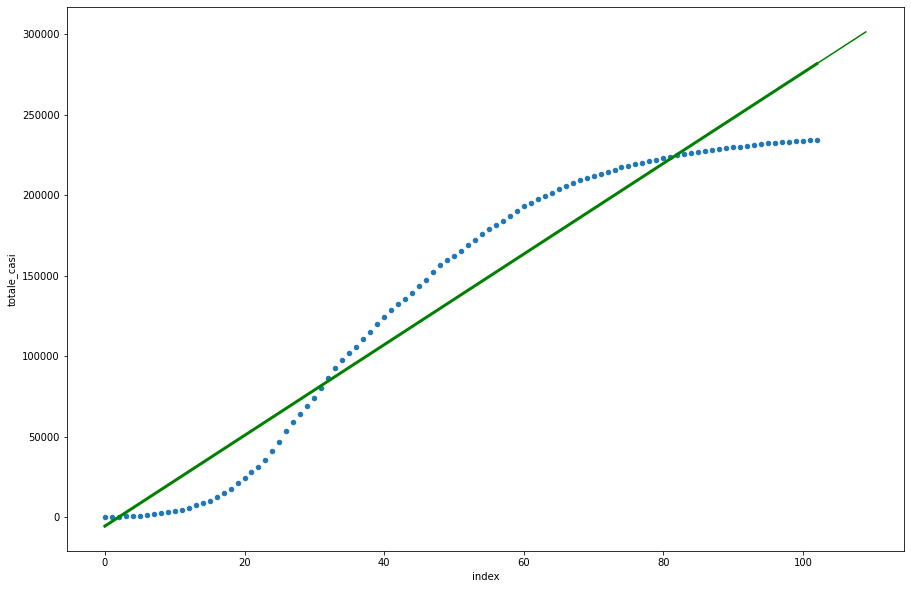

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.neural_network

X = np.c_[covid_ita["index"]]
y = covid_ita["totale_casi"]
futureX = np.c_[np.arange(X[-1], X[-1]+8)]

covid_ita.plot(kind="scatter", x="index", y="totale_casi", figsize = (15,10))

linear_m = sklearn.linear_model.LinearRegression()
linear_m.fit(X, y)
linear_y_predict = linear_m.predict(X)
plt.plot(X, linear_y_predict, color='g', linewidth=3)
plt.plot(futureX, linear_m.predict(futureX), color='g');

plt.show()


Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data:

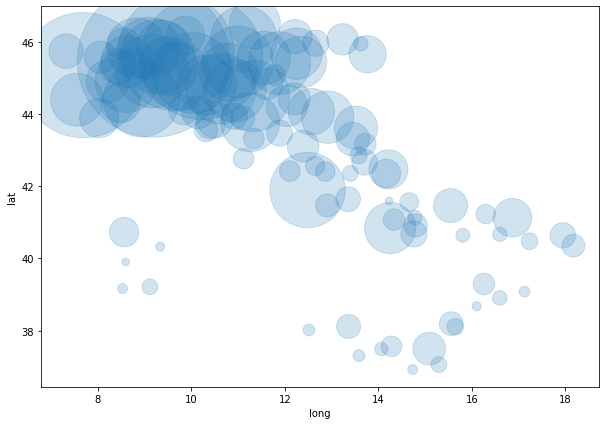

In [23]:
covid_pro.plot(kind="scatter", x="long", y="lat", alpha=0.2,
               s=covid_pro["totale_casi"], figsize = (10,7))

This looks like Italy all right. Setting `alpha` option to `0.2` makes it much easier to visualize the places where there is a high density of data points. The radius of each circle represents the district's total number of cases (option `s`).

As known the high density areas are in Northern Italy.

# MODELS FOR ITALY

## CURRENT POSITIVE CASES (ITALY)

### SIMPLE GAUSSIAN (ITALY - CURRENT POSITIVE CASES)

110766.53064980412 59.82407119713873 24.512413057649226


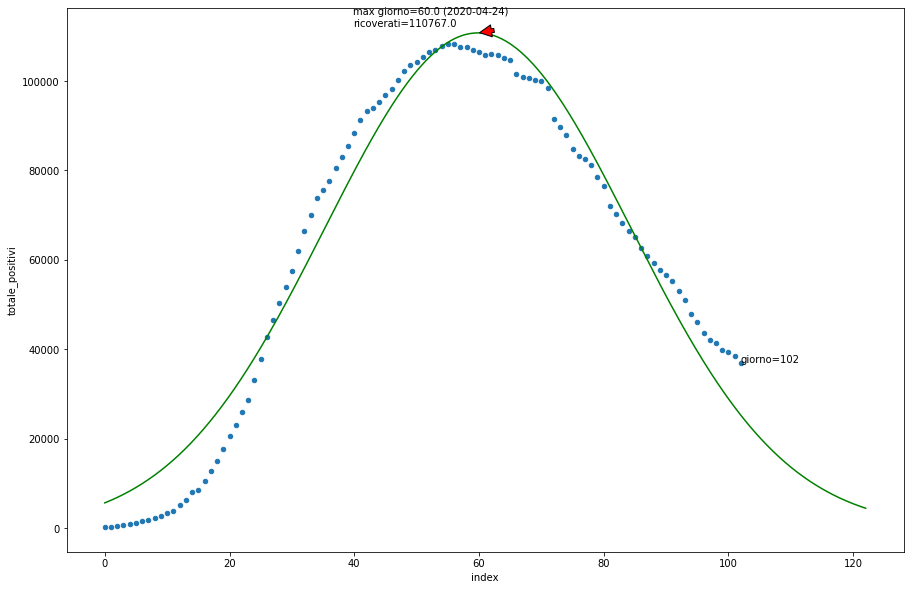

In [14]:
import datetime
from scipy.optimize import curve_fit

def fgauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def model_ita_gauss():
    covid_ita.plot(kind="scatter", x="index", y="totale_positivi", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_positivi"].to_numpy()

    fitting_parameters, covariance = curve_fit(fgauss, xnp, ynp)
    a, x0, sigma = fitting_parameters
    print(a, x0, sigma)

    x_min = xnp[0]
    x_max = xnp[-1] + 20
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fgauss(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max - 20, y_fit_max + 1500),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fgauss(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    
model_ita_gauss()

### DOUBLE GAUSSIAN (ITALY - CURRENT POSITIVE CASES)

This consider that we should consider at least two phases:
- in the first phase only a limited number of swabs could be taken;
- in the second one more nasopharyngeal swabs were available.

56682.65599902184 43.704457842286565 14.940434317736822
82582.07769892199 70.30685878438679 22.61002301988868


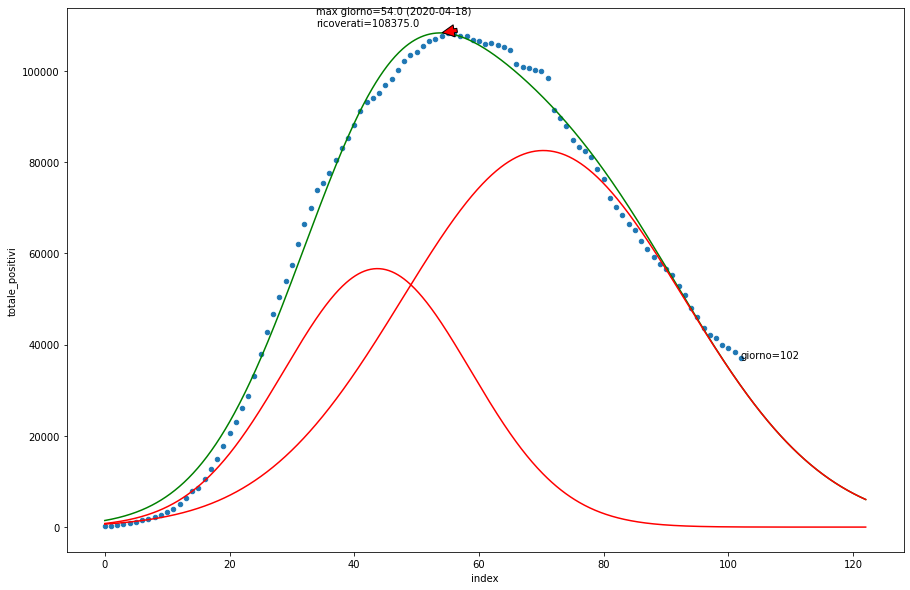

In [15]:
import datetime
from scipy.optimize import curve_fit

def fgauss2(x, a1, x01, sigma1, a2, x02, sigma2):
    return a1*np.exp(-(x-x01)**2/(2*sigma1**2)) + a2*np.exp(-(x-x02)**2/(2*sigma2**2))

def model_ita_gauss2():
    covid_ita.plot(kind="scatter", x="index", y="totale_positivi", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_positivi"].to_numpy()

    fitting_parameters, covariance = curve_fit(fgauss2, xnp, ynp)
    a1, x01, sigma1, a2, x02, sigma2 = fitting_parameters
    print(a1, x01, sigma1)
    print(a2, x02, sigma2)

    x_min = xnp[0]
    x_max = xnp[-1] + 20
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fgauss2(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max-20, y_fit_max + 1500),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fgauss2(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    plt.plot(x_fit, fgauss(x_fit, a1, x01, sigma1), '-', color="r", label='G1')
    plt.plot(x_fit, fgauss(x_fit, a2, x02, sigma2), '-', color="r", label='G2')
    
model_ita_gauss2()

### SKEWED GAUSSIAN (ITALY - CURRENT POSITIVE CASES)

43.545131211015054 33.402563197033516 2.582592274088004 -6107.619426754557 1262663.1924797788


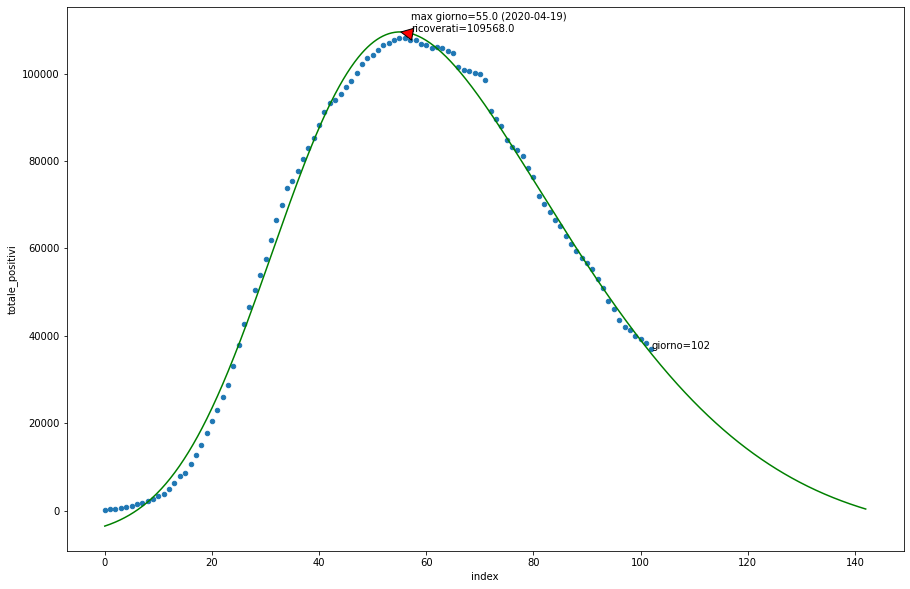

In [16]:
from scipy.special import erf

def fskew(x, sigmag, mu, alpha, c, a):
    #normal distribution
    normpdf = np.exp(-(x-mu)*(x-mu)/(2*sigmag*sigmag)) / sigmag*np.sqrt(2*np.pi)
    normcdf = 0.5 + 0.5*erf(alpha*((x-mu)/sigmag)/np.sqrt(2))
    return 2*a*normpdf*normcdf + c

def model_ita_skewed():
    covid_ita.plot(kind="scatter", x="index", y="totale_positivi", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_positivi"].to_numpy()

    #results = []
    #for i in range(100):
    #    p = np.random.randn(5) * 10
    #    try:
    #        fitting_parameters, covariance = curve_fit(fskew, xnp, ynp, p)
    #    except:
    #        pass
    #    err = np.sum(np.abs(fskew(xnp, *fitting_parameters) - ynp))
    #    results.append((err, fitting_parameters))
    #    #if err < 0.01:
    #    #    break
    #
    #err, fitting_parameters = min(results, key=lambda x:x[0])

    fitting_parameters, covariance = curve_fit(fskew, xnp, ynp, p0=(20, 30, 30, 0, 0))
    sigmag, mu, alpha, c, a = fitting_parameters
    print(sigmag, mu, alpha, c, a)

    x_min = xnp[0]
    x_max = xnp[-1] + 40
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fskew(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max+2, y_fit_max),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fskew(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    
model_ita_skewed()

## HOSPITALIZED (ITALY)

### GAUSSIAN (ITALY - HOSPITALIZED)
This model does **not depend on the number of swabs taken**.

32148.632729967485 48.051997609083784 -21.66643112020339


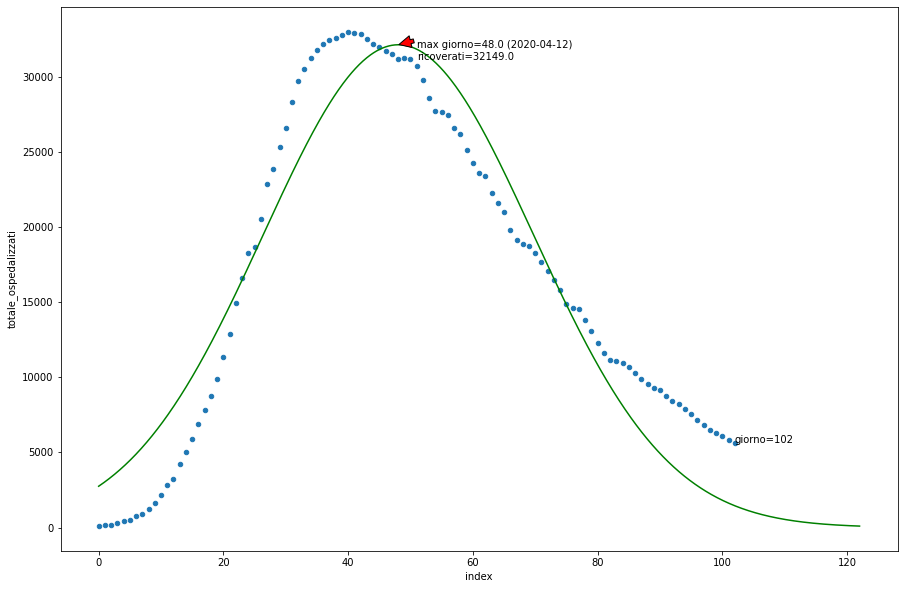

In [17]:
def model_ita_gauss_ospedalizzati():
    covid_ita.plot(kind="scatter", x="index", y="totale_ospedalizzati", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_ospedalizzati"].to_numpy()

    fitting_parameters, covariance = curve_fit(fgauss, xnp, ynp)
    a, x0, sigma = fitting_parameters
    print(a, x0, sigma)

    x_min = xnp[0]
    x_max = xnp[-1] + 20
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fgauss(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max+3, y_fit_max - 1000),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fgauss(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    
model_ita_gauss_ospedalizzati()

### DOUBLE GAUSSIAN (ITALY - HOSPITALIZED)
This model does **not depend on the number of swabs taken**.

17316.95996925662 64.20447129039434 -22.267007105565366
24573.84563709004 38.212429398456635 13.257892723609201


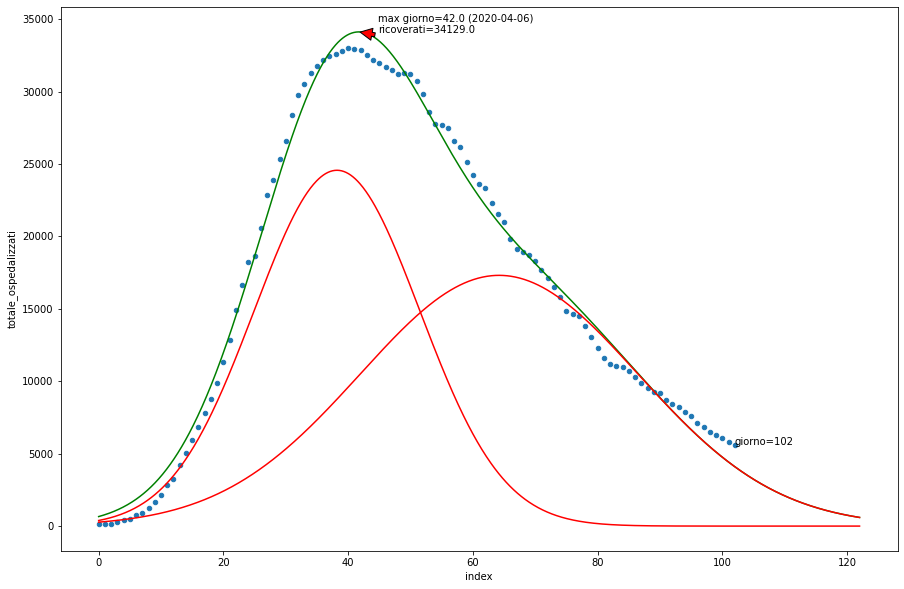

In [18]:
def model_ita_gauss2_hospitalized():
    covid_ita.plot(kind="scatter", x="index", y="totale_ospedalizzati", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_ospedalizzati"].to_numpy()

    fitting_parameters, covariance = curve_fit(fgauss2, xnp, ynp, p0=(100, 30, 100, 100, 30, 100))
    a1, x01, sigma1, a2, x02, sigma2 = fitting_parameters
    print(a1, x01, sigma1)
    print(a2, x02, sigma2)

    x_min = xnp[0]
    x_max = xnp[-1] + 20
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fgauss2(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max+3, y_fit_max - 100),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fgauss2(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    plt.plot(x_fit, fgauss(x_fit, a1, x01, sigma1), '-', color="r", label='G1')
    plt.plot(x_fit, fgauss(x_fit, a2, x02, sigma2), '-', color="r", label='G2')
    
model_ita_gauss2_hospitalized()

### SKEWED GAUSSIAN (ITALY - HOSPITALIZED)
This model does **not depend on the number of swabs taken**.

37.51733772227078 24.749739045055257 4.0979106329008035 390.56671477694164 279562.49434853764


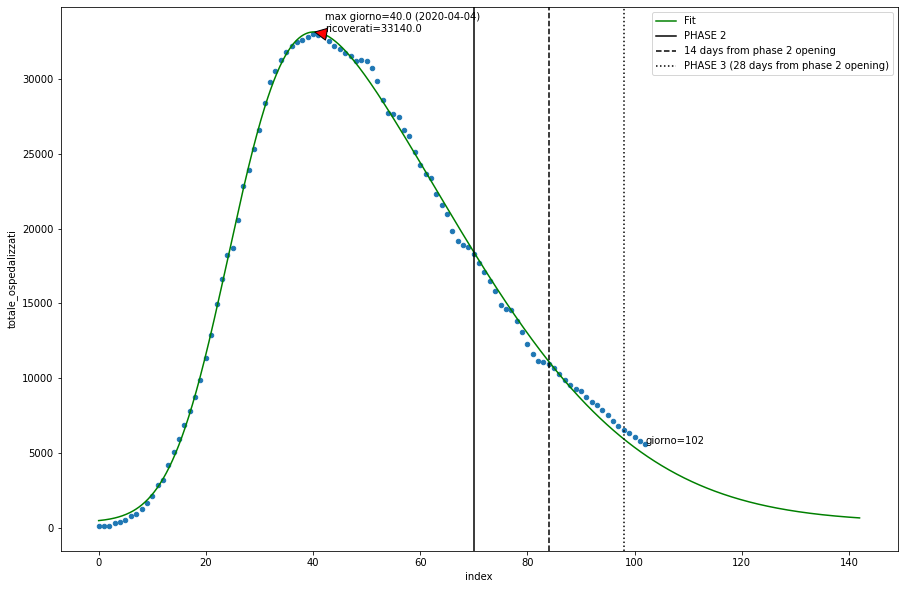

In [19]:
def model_ita_skewed_hospitalized():
    covid_ita.plot(kind="scatter", x="index", y="totale_ospedalizzati", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_ospedalizzati"].to_numpy()

    fitting_parameters, covariance = curve_fit(fskew, xnp, ynp, p0=(20, 20, 3, 15, 0))
    sigmag, mu, alpha, c, a = fitting_parameters
    print(sigmag, mu, alpha, c, a)

    x_min = xnp[0]
    x_max = xnp[-1] + 40
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fskew(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nricoverati=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max+2, y_fit_max),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fskew(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    plt.axvline(x=70, color="k", linestyle="-", label='PHASE 2')
    plt.axvline(x=84, color="k", linestyle="--", label='14 days from phase 2 opening')
    plt.axvline(x=98, color="k", linestyle=":", label='PHASE 3 (28 days from phase 2 opening)')
    plt.legend()
    
model_ita_skewed_hospitalized()

## TOTAL AMOUNT OF POSITIVE CASES (ITALY)

### SIGMOID (ITALY - TOTAL AMOUNT OF POSITIVE CASES)

13.107399576683886 36.88756769413514 256522.53693511506 -23680.390505387295


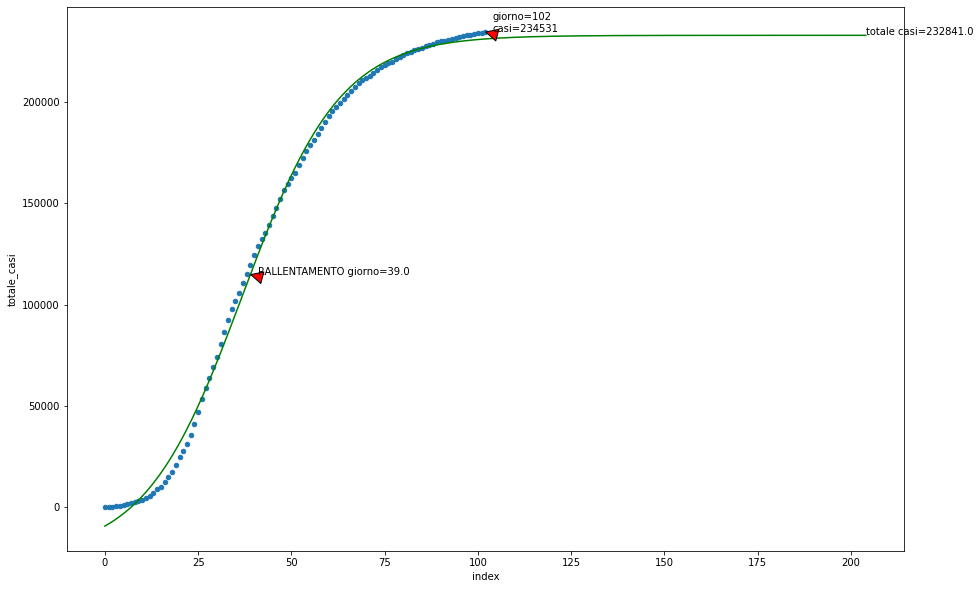

In [20]:
def fsigmoid(x, a, b, c, d):
    #return a * np.tanh(b * x + c) + d
    #return a * np.arctan(b * x + c) + d
    return c/(1. + np.exp(-(x-b)/a)) + d

def model_ita3():
    covid_ita.plot(kind="scatter", x="index", y="totale_casi", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["totale_casi"].to_numpy()

    fitting_parameters, covariance = curve_fit(fsigmoid, xnp, ynp, p0 = [1, 1, 1, 0])  # p0 = [10, 1, 1, 0]
    a, b, c, d = fitting_parameters
    print(a, b, c, d)

    x_min = xnp[0]
    x_max = 2 * xnp[-1]
    x_fit = np.linspace(x_min, x_max, 1000)
    
    y_fit = fsigmoid(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]
    
    x_fit_half_idx = np.where(np.isclose(y_fit, y_fit_max/2, 0.01))[0]
    x_fit_half = x_fit[x_fit_half_idx][0]
    x_fit_half_date = (covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_half))).date()
    
    rallentamento = str(x_fit_half_date)

    plt.annotate("totale casi=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max, y_fit_max))

    plt.annotate("giorno=" + str(xnp[-1]) + "\ncasi=" + str(ynp[-1]),
                 xy=(xnp[-1], ynp[xnp[-1]]), xytext=(xnp[-1]+2, ynp[xnp[-1]]),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("RALLENTAMENTO giorno=" + str(round(x_fit_half)),
                 xy=(round(x_fit_half), fsigmoid(round(x_fit_half), *fitting_parameters)),
                 xytext=(round(x_fit_half)+2, fsigmoid(round(x_fit_half), *fitting_parameters)),
                 arrowprops=dict(facecolor="r", shrink=0.05))
    
    plt.plot(x_fit, fsigmoid(x_fit, *fitting_parameters), '-', color="g", label='Fit')


model_ita3()

## INTENSIVE CARE (ITALY)

### SKEWED GAUSSIAN (ITALY - INTENSIVE CASE)
This model does **not depend on the number of swabs taken**.

29.226234636141502 23.672447471433077 3.3899922522973496 152.5054879790982 26389.215220691243


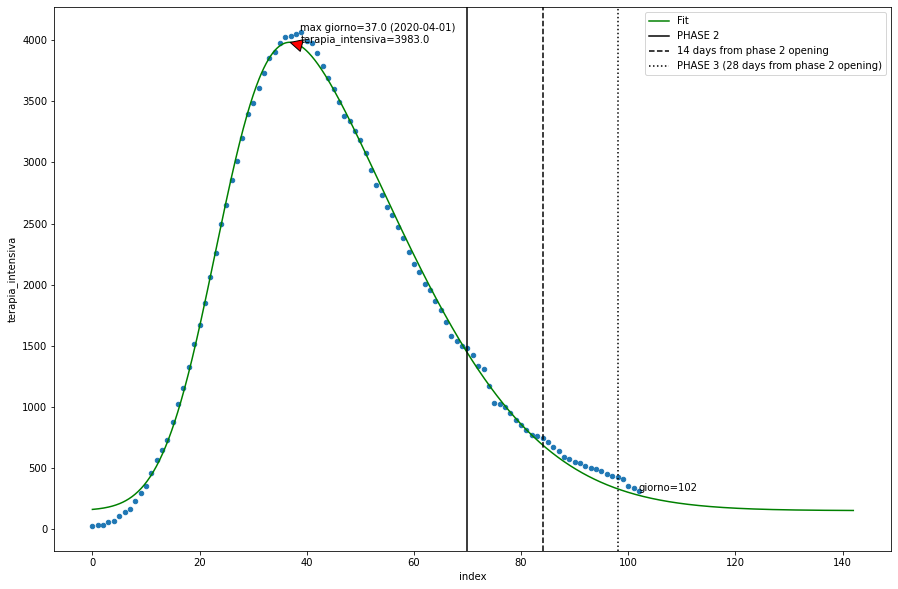

In [21]:
def model_ita_skewed_intensive_care():
    covid_ita.plot(kind="scatter", x="index", y="terapia_intensiva", figsize = (15,10))

    xnp = covid_ita["index"].to_numpy()
    ynp = covid_ita["terapia_intensiva"].to_numpy()

    fitting_parameters, covariance = curve_fit(fskew, xnp, ynp, p0=(30, 20, 3, 15, 0))
    sigmag, mu, alpha, c, a = fitting_parameters
    print(sigmag, mu, alpha, c, a)

    x_min = xnp[0]
    x_max = xnp[-1] + 40
    x_fit = np.linspace(x_min, x_max, 1000)

    y_fit = fskew(x_fit, *fitting_parameters)
    y_fit_max = np.max(y_fit)
    x_fit_max_idx = np.where(y_fit == y_fit_max)[0]
    x_fit_max = x_fit[x_fit_max_idx][0]

    picco = str((covid_ita["data"][0] + datetime.timedelta(days=np.round(x_fit_max))).date())

    plt.annotate("max giorno=" + str(np.round(x_fit_max)) + " (" + picco + ")" "\nterapia_intensiva=" + str(np.round(y_fit_max)),
                 xy=(x_fit_max, y_fit_max), xytext=(x_fit_max+2, y_fit_max),
                 arrowprops=dict(facecolor="r", shrink=0.05))

    plt.annotate("giorno=" + str(xnp[-1]), xy=(xnp[-1], ynp[xnp[-1]]))

    plt.plot(x_fit, fskew(x_fit, *fitting_parameters), '-', color="g", label='Fit')
    plt.axvline(x=70, color="k", linestyle="-", label='PHASE 2')
    plt.axvline(x=84, color="k", linestyle="--", label='14 days from phase 2 opening')
    plt.axvline(x=98, color="k", linestyle=":", label='PHASE 3 (28 days from phase 2 opening)')
    plt.legend()

    
model_ita_skewed_intensive_care()